In [36]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

import numpy as np
from scipy.stats import norm
from IPython.display import display


In [37]:
def DrawCircle(img,img_array,rad=3):
    copy_img=img.copy()
    draw = ImageDraw.Draw(copy_img)
    for idx, is_outlier in enumerate(img_array.flatten()):
        if is_outlier==0:
            x = idx % img.width
            y = idx // img.width
            radius = rad  # radius of the circle
            draw.ellipse((x-radius, y-radius, x+radius, y+radius), outline="red", width=1)
    display(copy_img)
    return copy_img

In [38]:
image_name="0080.jpg"
# Load the image
image_path = "rawimage/"+image_name
color_image = Image.open(image_path)


In [39]:

# Convert the image to grayscale
gray_image = color_image.convert("L")
gray_image_array=np.array(gray_image)


In [40]:

# Save the grayscale image
gray_image_path = "grayimages/"+image_name
gray_image.save(gray_image_path)


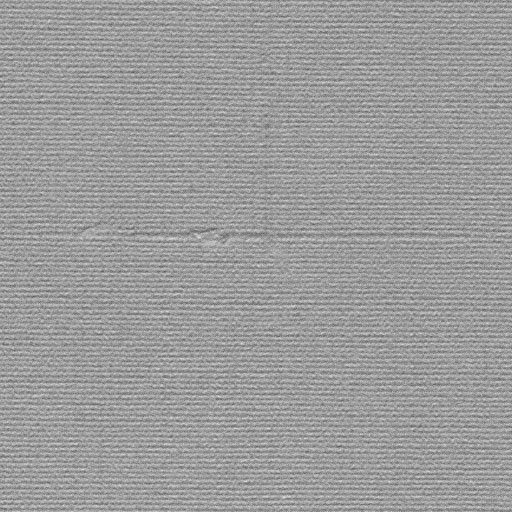

In [41]:
# Display the grayscale image
display(gray_image)

-----------------------------------------

# **1)**

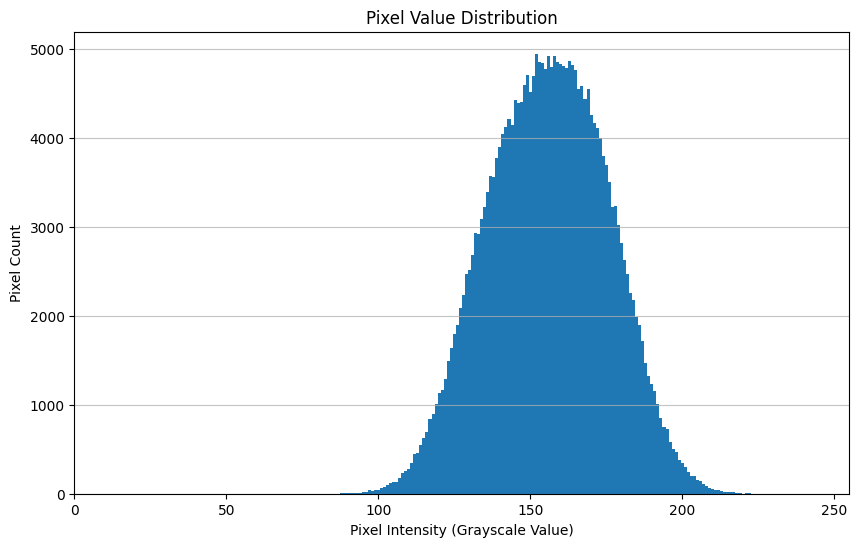

In [42]:
# Calculate the histogram of the grayscale image
histogram = gray_image.histogram()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(range(256), histogram, width=1, edgecolor="none")
plt.title("Pixel Value Distribution")
plt.xlabel("Pixel Intensity (Grayscale Value)")
plt.ylabel("Pixel Count")
plt.xlim(0, 255) # The range of grayscale values is from 0 (black) to 255 (white)
plt.grid(axis="y", alpha=0.75)
plt.show()


# **2)**

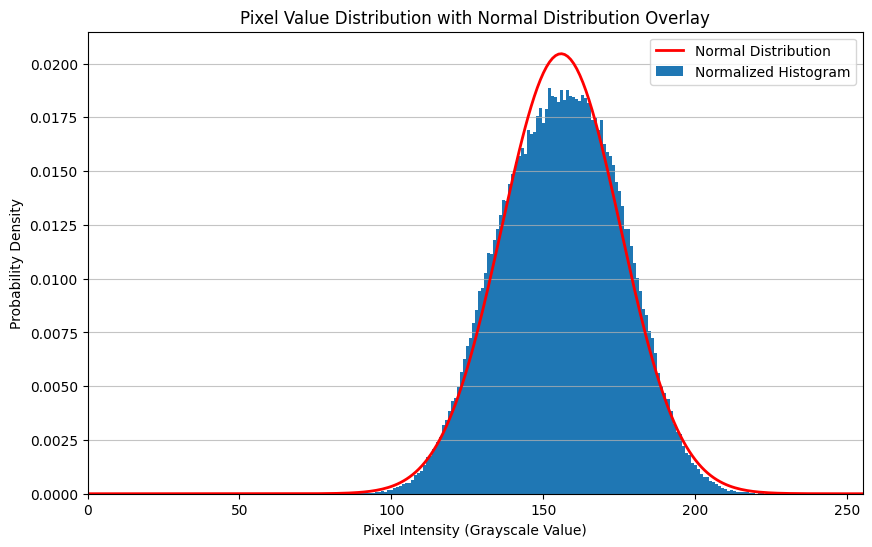

(155.81856155395508, 19.49987707277244)

In [43]:

# Calculate mean and standard deviation of the pixel intensities
pixel_values = np.array(gray_image).flatten()  # Flatten the 2D image into 1D pixel array
mean = np.mean(pixel_values)
std_dev = np.std(pixel_values)

# Generate a range of pixel values
pixel_range = np.arange(0, 256)

# Calculate the normal distribution with the same mean and standard deviation
normal_distribution = norm.pdf(pixel_range, mean, std_dev)

# Normalize the histogram to compare with the probability density function
histogram_normalized = histogram / (np.sum(histogram) * (pixel_range[1] - pixel_range[0]))

# Plot the histogram and the normal distribution
plt.figure(figsize=(10, 6))
plt.bar(pixel_range, histogram_normalized, width=1, edgecolor="none", label="Normalized Histogram")
plt.plot(pixel_range, normal_distribution, color="red", linewidth=2, label="Normal Distribution")
plt.title("Pixel Value Distribution with Normal Distribution Overlay")
plt.xlabel("Pixel Intensity (Grayscale Value)")
plt.ylabel("Probability Density")
plt.legend()
plt.xlim(0, 255)
plt.grid(axis="y", alpha=0.75)
plt.show()

mean, std_dev


# **3)**

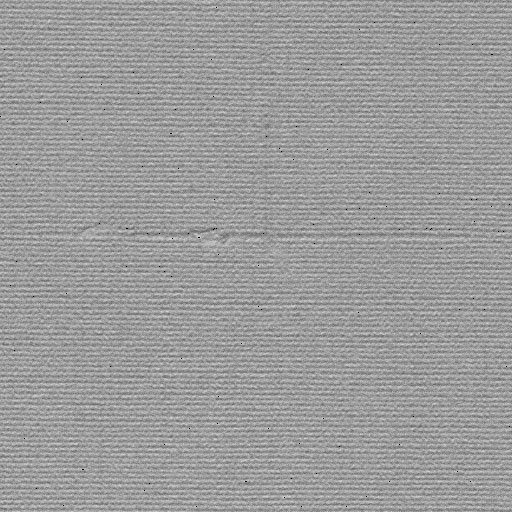

In [44]:
# Determine the lower and upper bounds for the 0.001 probability limits
lower_bound = norm.ppf(0.001, mean, std_dev)
upper_bound = norm.ppf(1-0.001, mean, std_dev)

# Identify pixels outside the bounds
outlier_pixels = np.logical_or(pixel_values < lower_bound, pixel_values > upper_bound)

# Create a copy of the pixel values to modify
modified_pixels = pixel_values.copy()

# Set the outlier pixels to 0 (black)
modified_pixels[outlier_pixels] = 0

# Reshape the modified pixels back to the original image shape
modified_image_array = modified_pixels.reshape(gray_image.size[::-1])
modified_image = Image.fromarray(modified_image_array)

display(modified_image)


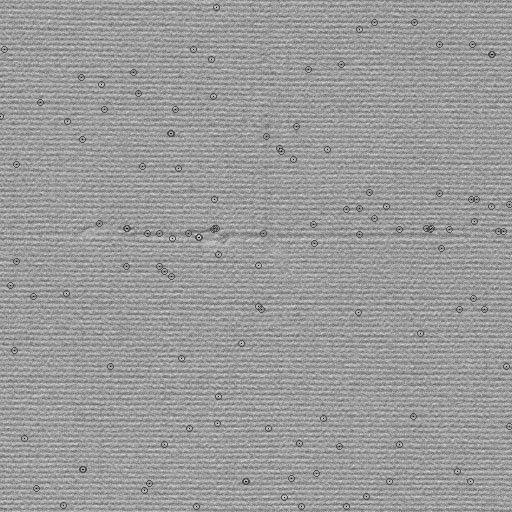

In [45]:
last_modified_image = DrawCircle(modified_image,modified_image_array)

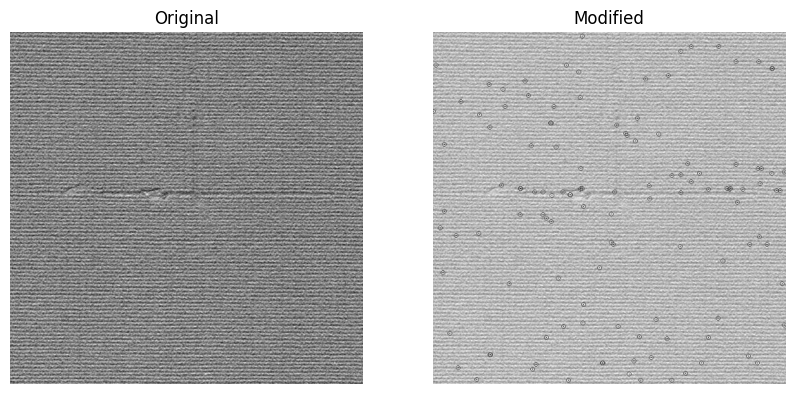

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(gray_image, cmap='gray')
ax1.set_title('Original')
ax1.axis('off')  

ax2.imshow(last_modified_image, cmap='gray')
ax2.set_title('Modified')
ax2.axis('off')  

plt.show()

# **4)**

In [47]:
def modify_image_array(img_array):
    
    pixel_values = np.array(img_array).flatten()  # Flatten the 2D image into 1D pixel array
    mean = np.mean(pixel_values)
    std_dev = np.std(pixel_values)

    # Determine the lower and upper bounds for the 0.001 probability limits
    lower_bound = norm.ppf(0.001, mean, std_dev)
    upper_bound = norm.ppf(1-0.001, mean, std_dev)

    # Identify pixels outside the bounds
    outlier_pixels = np.logical_or(pixel_values < lower_bound, pixel_values > upper_bound)

    # Create a copy of the pixel values to modify
    modified_pixels = pixel_values.copy()

    # Set the outlier pixels to 0 (black)
    modified_pixels[outlier_pixels] = 0

    # Reshape the modified pixels back to the original image shape
    modified_image_array = modified_pixels.reshape(img_array.shape)
    return modified_image_array

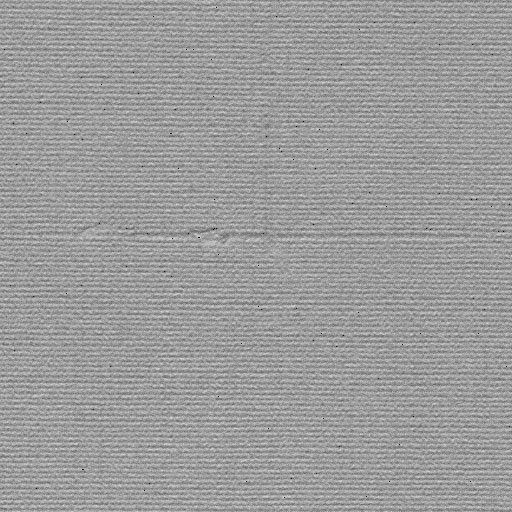

In [48]:
local_modified_image_array=gray_image_array.copy()

window_size=51

for i in range(1,gray_image_array.shape[0] - window_size+1,window_size):
    for j in range(1,gray_image_array.shape[1] - window_size+1,window_size):
        # Extract the local window
        local_window = gray_image_array[i:i + window_size,
                                    j:j +window_size]
        local_array = modify_image_array(local_window)
        local_modified_image_array[i:i + window_size,
                                    j:j +window_size]=local_array
        
local_modified_image = Image.fromarray(np.uint8(local_modified_image_array))

display(local_modified_image)


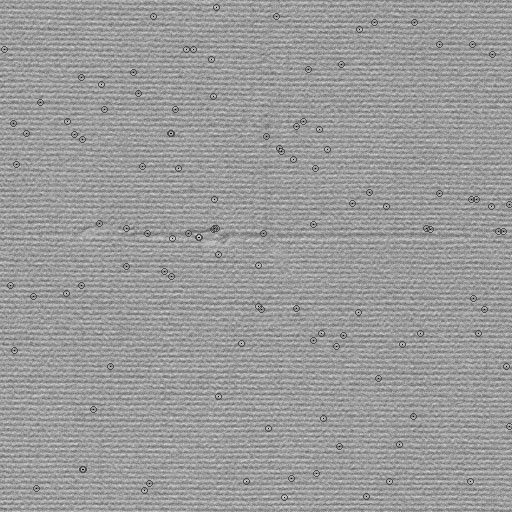

In [49]:
last_local_modified_image = DrawCircle(local_modified_image,local_modified_image_array)

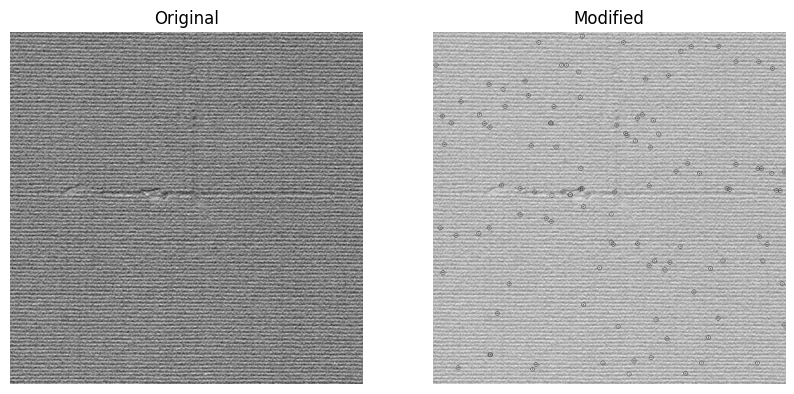

In [50]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(gray_image, cmap='gray')
ax1.set_title('Original')
ax1.axis('off')  

ax2.imshow(last_local_modified_image, cmap='gray')
ax2.set_title('Modified')
ax2.axis('off')  

plt.show()